In [1]:
from itertools import combinations

import numpy as np
from scipy import stats

import networkx as nx

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
COLORS = [
    '#00B0F0',
    '#FF0000'
]

# Chapter 01

This chapter introduces the concept of causality and highlights similarities and differences between causal inference and statistical learning. A brief historical outline of the concept of causality is provided to help the reader understand a broader context. Finally, three motivating examples are provided (medicine, marketing, social policy) to demonstrate the importance of causal inference in terms of technical, practical and business perspectives. 

## Confounding 

In [3]:
# Let's set random seed for reproducibility
np.random.seed(45)

# `b` represents our confounder
b = np.random.rand(100)

# `a` and `c` are causally independent of each other, but they are both children of `b` 
a = b + .1 * np.random.rand(100)
c = b + .3 * np.random.rand(100)

In [4]:
# Let's check correlation between `a` and `c`
coef, p_val = stats.pearsonr(a, c)

print(coef)

0.962749762529751


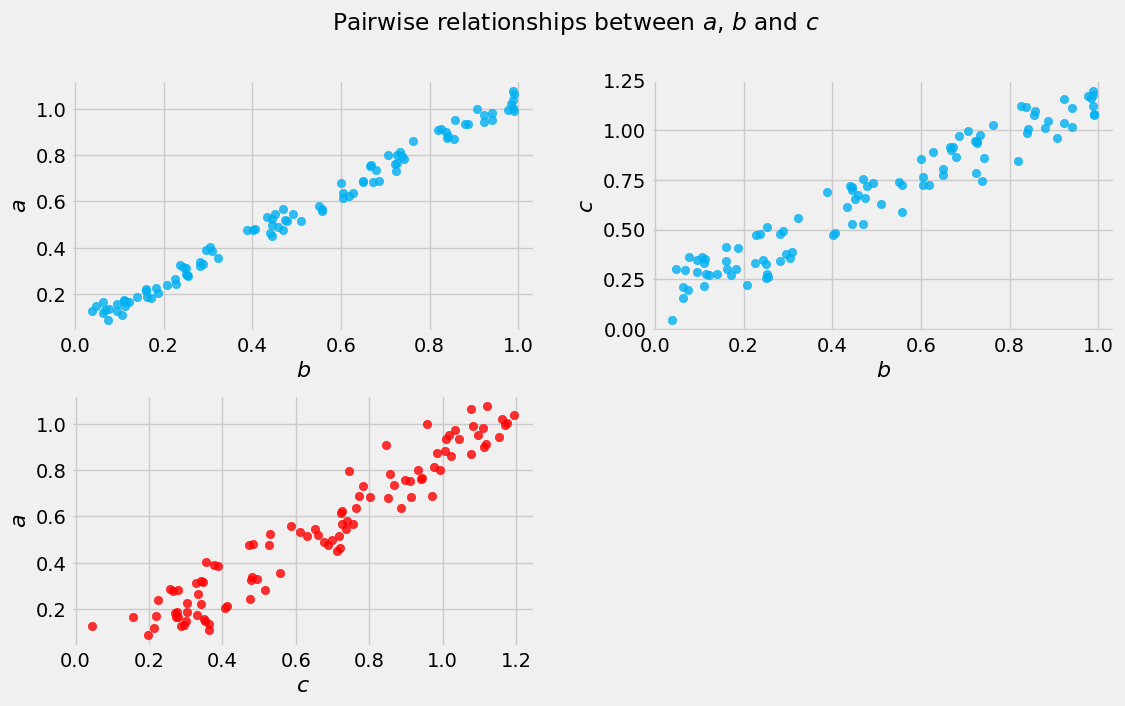

In [5]:
variables = {
    'a': a,
    'b': b,
    'c': c
}

plt.figure(figsize=(12, 7))

for i, (var_1, var_2) in enumerate([('b', 'a'), ('b', 'c'), ('c', 'a')]):
    
    color = COLORS[1]
    
    if 'b' in [var_1, var_2]:
        color = COLORS[0]
    
    plt.subplot(2, 2, i + 1)
    plt.scatter(variables[var_1], variables[var_2], alpha=.8, color=color)
    
    plt.xlabel(f'${var_1}$', fontsize=16)
    plt.ylabel(f'${var_2}$', fontsize=16)

plt.suptitle('Pairwise relationships between $a$, $b$ and $c$')
plt.subplots_adjust(hspace=.25, wspace=.25)
plt.show()